# 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd   # pandas 라이브러리를 불러오고 pd라고 명명
import numpy as np    # numpy 라이브러리를 불러오고 np라고 명명

# csv 데이터 파일을 읽어와 df에 저장
df = pd.read_csv("/content/drive/MyDrive/HS_DataProgramming/project/winemag-data-130k-v2.csv")
df.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [ ]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [ ]:
#데이터 행과 열 갯수
df.shape

(129971, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)



# **교수님 승인 - description과 designation 제외**

In [3]:
# description, designation 제외
cols = ['country', 'points', 'price', 'province', 'region_1', 'region_2',
 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']
df1 = df[cols]
df1.head(3)

,country,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [ ]:
df1.columns

Index(['country', 'points', 'price', 'province', 'region_1', 'region_2',
       'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   points                 129971 non-null  int64  
 2   price                  120975 non-null  float64
 3   province               129908 non-null  object 
 4   region_1               108724 non-null  object 
 5   region_2               50511 non-null   object 
 6   taster_name            103727 non-null  object 
 7   taster_twitter_handle  98758 non-null   object 
 8   title                  129971 non-null  object 
 9   variety                129970 non-null  object 
 10  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 10.9+ MB


In [ ]:
df1.isnull().any()

country                   True
points                   False
price                     True
province                  True
region_1                  True
region_2                  True
taster_name               True
taster_twitter_handle     True
title                    False
variety                   True
winery                   False
dtype: bool

# **교수님 승인 - 61% 인 region_2 제거**


In [ ]:
df1.isnull().mean().sort_values(ascending=False)

region_2                 0.611367
taster_twitter_handle    0.240154
taster_name              0.201922
region_1                 0.163475
price                    0.069215
country                  0.000485
province                 0.000485
variety                  0.000008
points                   0.000000
title                    0.000000
winery                   0.000000
dtype: float64

In [4]:
#region_2 삭제
df2 = df1.drop('region_2', axis=1)
df2.isnull().mean().sort_values(ascending=False)

taster_twitter_handle    0.240154
taster_name              0.201922
region_1                 0.163475
price                    0.069215
country                  0.000485
province                 0.000485
variety                  0.000008
points                   0.000000
title                    0.000000
winery                   0.000000
dtype: float64

id 변수 확인 -> 없음

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   points                 129971 non-null  int64  
 2   price                  120975 non-null  float64
 3   province               129908 non-null  object 
 4   region_1               108724 non-null  object 
 5   taster_name            103727 non-null  object 
 6   taster_twitter_handle  98758 non-null   object 
 7   title                  129971 non-null  object 
 8   variety                129970 non-null  object 
 9   winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 9.9+ MB


In [ ]:
#고유한 값의 수
df2.nunique()

country                      43
points                       21
price                       390
province                    425
region_1                   1229
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

In [ ]:
#'title'이 모든 행에 대해 고유하지 않음
df2['title'].nunique() == df2.shape[0]

False

##타깃 변수 설정 : points_B

In [ ]:
df2['points'].dtypes

dtype('int64')

In [ ]:
df2['points'].describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [ ]:
#points의 결측값 확인
df2['points'].isnull().sum()

0

In [ ]:
#points의 중복 여부 체크
n = len(pd.unique(df2['points']))
print(n)
#전체 129971에서 유일한 값을 갖는 points는 21개

21


In [ ]:
#points의 숫자 형태가 아닌 값 존재 여부
mask = pd.to_numeric(df2['points'], errors='coerce').isna()
a = mask.sum()
print(a)

0


In [ ]:
df2['points'].value_counts(dropna=False, normalize=True)

88     0.132391
87     0.130283
90     0.118565
86     0.096945
89     0.094067
91     0.087396
92     0.073963
85     0.073324
93     0.049927
84     0.049857
94     0.028914
83     0.023274
82     0.014126
95     0.011810
81     0.005324
96     0.004024
80     0.003055
97     0.001762
98     0.000592
99     0.000254
100    0.000146
Name: points, dtype: float64

In [ ]:
df2['points'].median()

88.0

In [5]:
#새로운 타깃 변수로 points_B 만들고 중위수 이상이면 1, 작으면 0 부여
c1 = df2['points'] >= 88
c0 = df2['points'] < 88

df2.loc[c1, "points_B"] = 1
df2.loc[c0, "points_B"] = 0

In [ ]:
#points_B값의 개수 분포 구하기
df2['points_B'].value_counts(dropna=False)

1.0    78478
0.0    51493
Name: points_B, dtype: int64

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   points                 129971 non-null  int64  
 2   price                  120975 non-null  float64
 3   province               129908 non-null  object 
 4   region_1               108724 non-null  object 
 5   taster_name            103727 non-null  object 
 6   taster_twitter_handle  98758 non-null   object 
 7   title                  129971 non-null  object 
 8   variety                129970 non-null  object 
 9   winery                 129971 non-null  object 
 10  points_B               129971 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 10.9+ MB


In [ ]:
#왜도 허용 범위
df2['points'].skew()

0.04592075245532028

In [ ]:
#첨도 허용 범위
df2['points'].kurtosis()

-0.29596318983875936

# **교수님 승인 - 타겟 변수 비율 60:39**





In [ ]:
#points_B값의 비율 분포 구하기
df2['points_B'].value_counts(dropna=False, normalize=True)

1.0    0.603812
0.0    0.396188
Name: points_B, dtype: float64

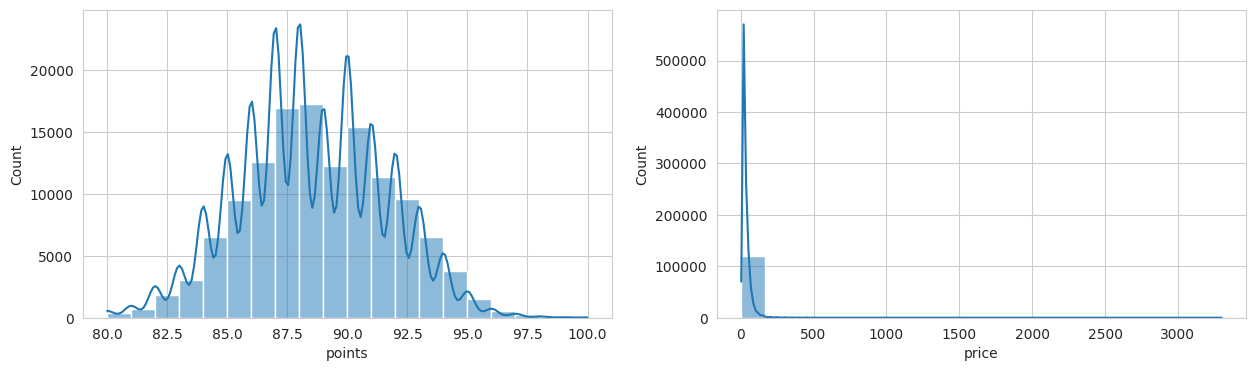

In [ ]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(ax=axes[0], data=df2, x="points", kde=True, bins=20);
sns.histplot(ax=axes[1], data=df2, x="price", kde=True, bins=20);

<Axes: xlabel='points_B', ylabel='price'>

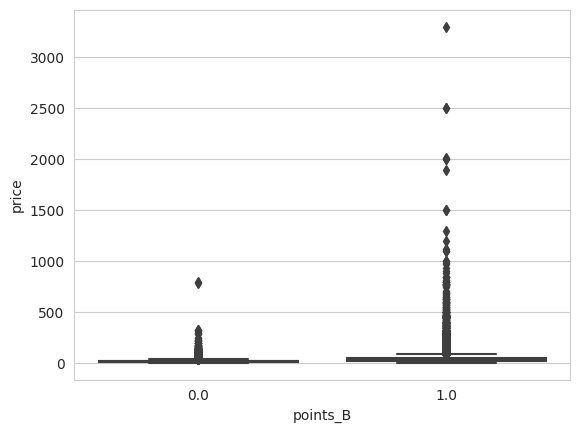

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(x = 'points_B', y = 'price', data = df2) 

# 이상값 제거

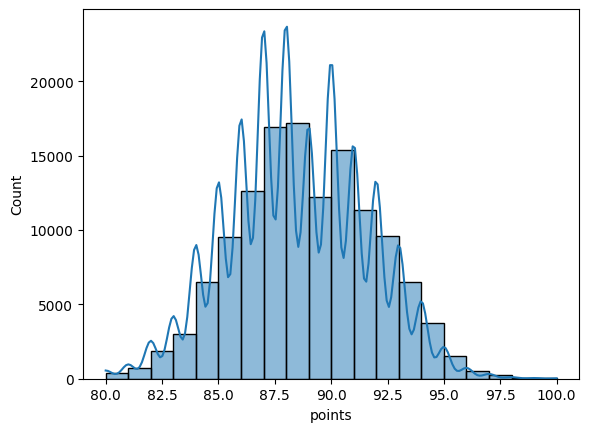

In [ ]:
#히스토그램
import seaborn as sns
sns.histplot(data=df2, x="points", kde=True, bins=20);

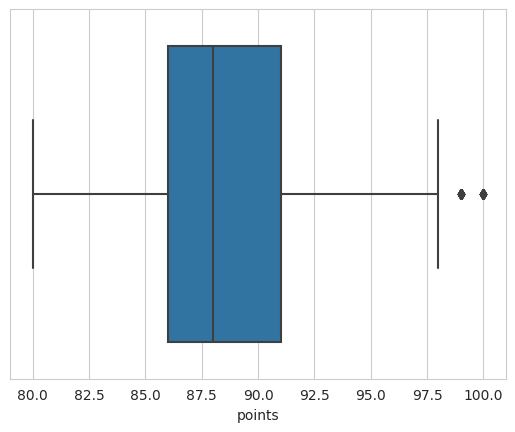

In [ ]:
#상자그림
sns.set_style('whitegrid')
sns.boxplot(x='points', data=df2);

In [ ]:
Q1 = df2[['points']].quantile(0.25)
Q3 = df2[['points']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

points    5.0
dtype: float64


데이터가 꽤 정규분포에 가까운 형태를 보여서, 보다 엄격한 기준인 1.5 * IQR를 사용

In [ ]:
Lower = Q1-1.5*IQR  #하한
print(Lower)
print(f"min: {df2['points'].min()}")

points    78.5
dtype: float64
min: 80


In [ ]:
Upper = Q1+1.5*IQR  #상한
print(Upper)
print(f"max: {df2['points'].max()}")

points    93.5
dtype: float64
max: 100


최대값이 100이므로 실제로 이상치로 간주되는 와인이 매우 드물거나 존재하지 않음을 의미

대부분의 와인들은 93.5점 이하의 점수를 받았으며, 93.5점을 초과하는 와인은 비교적 소수

이상치 이상의 와인들은 평가에서 주요한 부분을 차지하는 대표적인 와인으로 취급한다고 판단

-> 이상치 처리의 필요성이 없음

In [ ]:
df2.shape

(129971, 11)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   points                 129971 non-null  int64  
 2   price                  120975 non-null  float64
 3   province               129908 non-null  object 
 4   region_1               108724 non-null  object 
 5   taster_name            103727 non-null  object 
 6   taster_twitter_handle  98758 non-null   object 
 7   title                  129971 non-null  object 
 8   variety                129970 non-null  object 
 9   winery                 129971 non-null  object 
 10  points_B               129971 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 10.9+ MB


In [ ]:
#와인의 리뷰어별 점수('points_B') 분포를 상대 빈도수로
#각 리뷰어에게서 어떤 점수('points_B')가 얼마나 자주 등장하는지를 쉽게 파악

pd.crosstab(df2['taster_name'], df2['points_B'], normalize=True).round(2)

points_B,0.0,1.0
taster_name,,
Alexander Peartree,0.00,0.00
Anna Lee C. Iijima,0.02,0.03
Anne Krebiehl MW,0.00,0.03
Carrie Dykes,0.00,0.00
Christina Pickard,0.00,0.00
Fiona Adams,0.00,0.00
Jeff Jenssen,0.00,0.00
Jim Gordon,0.01,0.03
Joe Czerwinski,0.02,0.03


In [ ]:
pd.crosstab(df2['price'], df2['points_B'])

points_B,0.0,1.0
price,,
4.0,11,0
5.0,46,0
6.0,115,5
7.0,417,16
8.0,845,47
...,...,...
1900.0,0,1
2000.0,0,2
2013.0,0,1


범주형 변수 도수분포표 검토

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

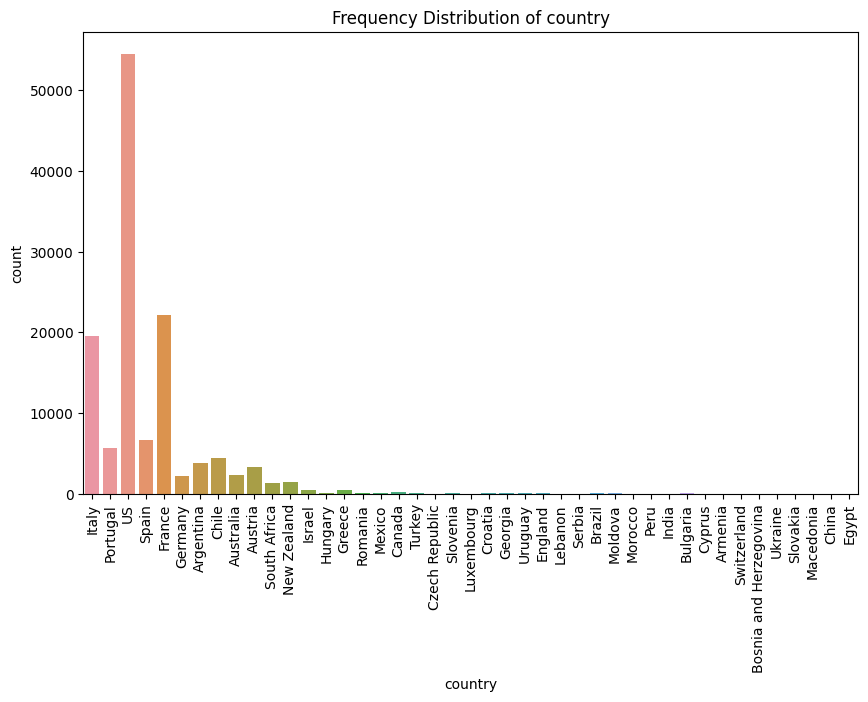

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 범주형 변수의 도수분포표 검토
print(df2['country'].value_counts())

# 범주형 변수의 도수분포 시각화
plt.figure(figsize=(10,6))
sns.countplot(x='country', data=df2)
plt.title('Frequency Distribution of country')
plt.xticks(rotation=90)  # x축 레이블이 겹치지 않도록 90도 회전
plt.show()

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64


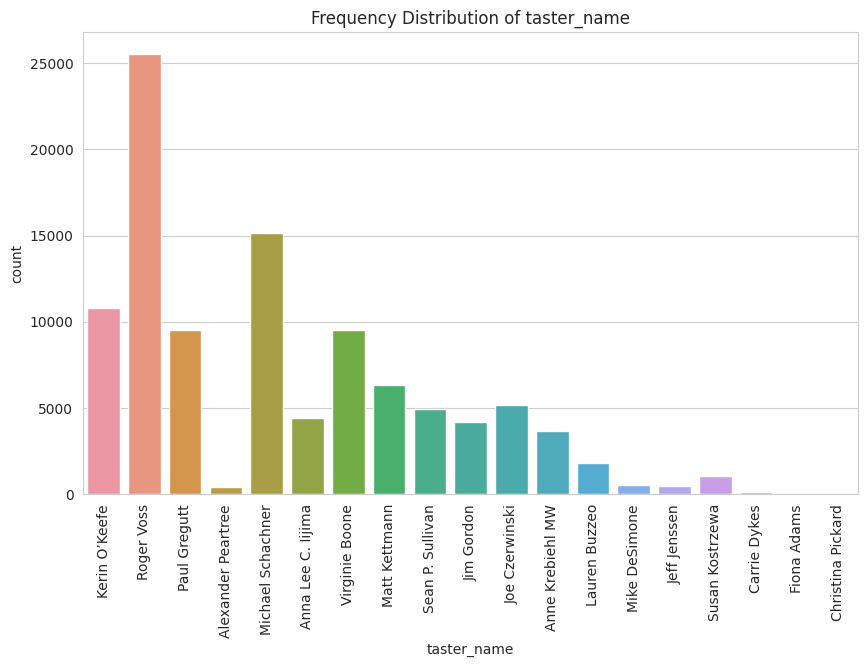

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 범주형 변수의 도수분포표 검토
print(df2['taster_name'].value_counts())

# 범주형 변수의 도수분포 시각화
plt.figure(figsize=(10,6))
sns.countplot(x='taster_name', data=df2)
plt.title('Frequency Distribution of taster_name')
plt.xticks(rotation=90)  # x축 레이블이 겹치지 않도록 90도 회전
plt.show()


# 범주형 변수 숫자로 변환

In [7]:
from sklearn.preprocessing import OrdinalEncoder

df2['country_encoded'] = OrdinalEncoder().fit_transform(
    df['country'].values.reshape(-1,1))
#변경 전후 비교표를 출력
df2.groupby(['country', 'country_encoded']).size()

country                 country_encoded
Argentina               0.0                 3800
Armenia                 1.0                    2
Australia               2.0                 2329
Austria                 3.0                 3345
Bosnia and Herzegovina  4.0                    2
Brazil                  5.0                   52
Bulgaria                6.0                  141
Canada                  7.0                  257
Chile                   8.0                 4472
China                   9.0                    1
Croatia                 10.0                  73
Cyprus                  11.0                  11
Czech Republic          12.0                  12
Egypt                   13.0                   1
England                 14.0                  74
France                  15.0               22093
Georgia                 16.0                  86
Germany                 17.0                2165
Greece                  18.0                 466
Hungary                 19.0 

In [8]:
df2['province_encoded'] = OrdinalEncoder().fit_transform(
    df['province'].values.reshape(-1,1))
#변경 전후 비교표를 출력
df2.groupby(['province', 'province_encoded']).size()

province                   province_encoded
Achaia                     0.0                   5
Aconcagua Costa            1.0                  27
Aconcagua Valley           2.0                 116
Aegean                     3.0                  22
Agioritikos                4.0                   3
                                              ... 
Zenata                     420.0                19
Österreichischer Perlwein  421.0                 4
Österreichischer Sekt      422.0                66
Štajerska                  423.0                22
Župa                       424.0                 8
Length: 425, dtype: int64

In [9]:
df2['region_1_encoded'] = OrdinalEncoder().fit_transform(
    df['region_1'].values.reshape(-1,1))
#변경 전후 비교표를 출력
df2.groupby(['region_1', 'region_1_encoded']).size()

region_1             region_1_encoded
Abruzzo              0.0                   6
Adelaida District    1.0                 110
Adelaide             2.0                  16
Adelaide Hills       3.0                 107
Adelaide Plains      4.0                   4
                                        ... 
Yolo County          1224.0               47
York Mountain        1225.0                9
Yorkville Highlands  1226.0               79
Yountville           1227.0               92
Zonda Valley         1228.0                3
Length: 1229, dtype: int64

In [10]:
df2['taster_name_encoded'] = OrdinalEncoder().fit_transform(
    df['taster_name'].values.reshape(-1,1))
#변경 전후 비교표를 출력
df2.groupby(['taster_name', 'taster_name_encoded']).size()

taster_name         taster_name_encoded
Alexander Peartree  0.0                      415
Anna Lee C. Iijima  1.0                     4415
Anne Krebiehl MW    2.0                     3685
Carrie Dykes        3.0                      139
Christina Pickard   4.0                        6
Fiona Adams         5.0                       27
Jeff Jenssen        6.0                      491
Jim Gordon          7.0                     4177
Joe Czerwinski      8.0                     5147
Kerin O’Keefe       9.0                    10776
Lauren Buzzeo       10.0                    1835
Matt Kettmann       11.0                    6332
Michael Schachner   12.0                   15134
Mike DeSimone       13.0                     514
Paul Gregutt        14.0                    9532
Roger Voss          15.0                   25514
Sean P. Sullivan    16.0                    4966
Susan Kostrzewa     17.0                    1085
Virginie Boone      18.0                    9537
dtype: int64

In [11]:
df2['taster_twitter_handle_encoded'] = OrdinalEncoder().fit_transform(
    df['taster_twitter_handle'].values.reshape(-1,1))
#변경 전후 비교표를 출력
df2.groupby(['taster_twitter_handle', 'taster_twitter_handle_encoded']).size()

taster_twitter_handle  taster_twitter_handle_encoded
@AnneInVino            0.0                               3685
@JoeCz                 1.0                               5147
@bkfiona               2.0                                 27
@gordone_cellars       3.0                               4177
@kerinokeefe           4.0                              10776
@laurbuzz              5.0                               1835
@mattkettmann          6.0                               6332
@paulgwine             7.0                               9532
@suskostrzewa          8.0                               1085
@vboone                9.0                               9537
@vossroger             10.0                             25514
@wawinereport          11.0                              4966
@wineschach            12.0                             15134
@winewchristina        13.0                                 6
@worldwineguys         14.0                              1005
dtype: int64

In [12]:
df2['title_encoded'] = OrdinalEncoder().fit_transform(
    df['title'].values.reshape(-1,1))
#변경 전후 비교표를 출력
df2.groupby(['title', 'title_encoded']).size()

title                                                                          title_encoded
1+1=3 2008 Rosé Cabernet Sauvignon (Penedès)                                   0.0              1
1+1=3 NV Brut Sparkling (Cava)                                                 1.0              2
1+1=3 NV Cygnus Brut Nature Reserva Made With Organic Grapes Sparkling (Cava)  2.0              2
1+1=3 NV Rosé Sparkling (Cava)                                                 3.0              1
10 Knots 2006 Beachcomber White (Paso Robles)                                  4.0              1
                                                                                               ..
àMaurice 2014 Fred Estate Syrah (Walla Walla Valley (WA))                      118835.0         1
àMaurice NV Pour Me Red (Columbia Valley (WA))                                 118836.0         1
Štoka 2009 Izbrani Teran (Kras)                                                118837.0         1
Štoka 2011 Grganja Vitovs

In [13]:
df2['variety_encoded'] = OrdinalEncoder().fit_transform(
    df['variety'].values.reshape(-1,1))
#변경 전후 비교표를 출력
df2.groupby(['variety', 'variety_encoded']).size()

variety      variety_encoded
Abouriou     0.0                   3
Agiorgitiko  1.0                  63
Aglianico    2.0                 359
Aidani       3.0                   1
Airen        4.0                   3
                                ... 
Zinfandel    702.0              2714
Zlahtina     703.0                 2
Zweigelt     704.0               209
Çalkarası    705.0                 2
Žilavka      706.0                 1
Length: 707, dtype: int64

In [14]:
df2['winery_encoded'] = OrdinalEncoder().fit_transform(
    df['winery'].values.reshape(-1,1))
#변경 전후 비교표를 출력
df2.groupby(['winery', 'winery_encoded']).size()

winery               winery_encoded
1+1=3                0.0                6
10 Knots             1.0                4
100 Percent Wine     2.0                3
1000 Stories         3.0                2
1070 Green           4.0                1
                                       ..
Órale                16752.0            1
Öko                  16753.0            2
Ökonomierat Rebholz  16754.0            4
àMaurice             16755.0           40
Štoka                16756.0            3
Length: 16757, dtype: int64

In [15]:
#기존 범주형 변수 제거
df3 = df2.drop(['country', 'province', 'region_1', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery'], axis=1)
df3.columns

Index(['points', 'price', 'points_B', 'country_encoded', 'province_encoded',
       'region_1_encoded', 'taster_name_encoded',
       'taster_twitter_handle_encoded', 'title_encoded', 'variety_encoded',
       'winery_encoded'],
      dtype='object')

In [16]:
#결측값 제거
df3 = df3.dropna()
df3.head(3)

,points,price,points_B,country_encoded,province_encoded,region_1_encoded,taster_name_encoded,taster_twitter_handle_encoded,title_encoded,variety_encoded,winery_encoded
2,87,14.0,0.0,40.0,268.0,1217.0,14.0,7.0,89782.0,436.0,13018.0
4,87,65.0,0.0,40.0,268.0,1217.0,14.0,7.0,102810.0,440.0,14621.0
5,87,15.0,0.0,37.0,262.0,757.0,12.0,12.0,103585.0,590.0,14706.0


# 상관관계 검토

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74292 entries, 2 to 129970
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   points                         74292 non-null  int64  
 1   price                          74292 non-null  float64
 2   points_B                       74292 non-null  float64
 3   country_encoded                74292 non-null  float64
 4   province_encoded               74292 non-null  float64
 5   region_1_encoded               74292 non-null  float64
 6   taster_name_encoded            74292 non-null  float64
 7   taster_twitter_handle_encoded  74292 non-null  float64
 8   title_encoded                  74292 non-null  float64
 9   variety_encoded                74292 non-null  float64
 10  winery_encoded                 74292 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 6.8 MB


In [ ]:
cols = ['points_B', 'price']
round(df3[cols].corr(), 2)

,points_B,price
points_B,1.00,0.25
price,0.25,1.00



points_B와 price의 상관계수는 0.25입니다. 이는 두 변수 간에 약한 양의 상관관계가 있음을 나타냅니다. 즉, 'points_B'가 증가하면 'price'도 약간 증가하는 경향이 있습니다.



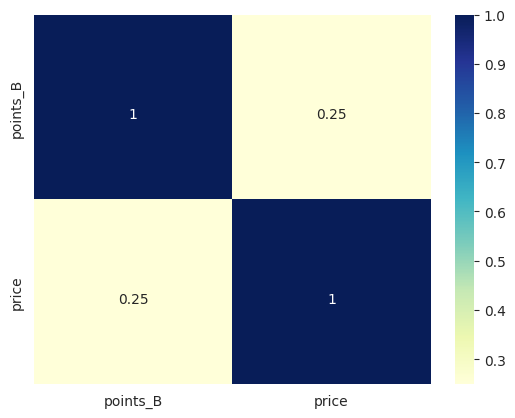

In [ ]:
import seaborn as sns

corr = df3[cols].corr()  
annot_kws = {"ha": 'center',"va": 'top'}
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws, cmap="YlGnBu");

# t-검정

In [ ]:
from scipy import stats

data_1 = df3[df3['points_B'] == 1]['price']
data_0 = df3[df3['points_B'] == 0]['price']

stats.ttest_ind(data_1, data_0)  

Ttest_indResult(statistic=68.92860250998318, pvalue=0.0)

# **타겟 분할**

In [ ]:
#points 제거
dft = df3.drop(['points'], axis=1)
dft.head()

,price,points_B,country_encoded,province_encoded,region_1_encoded,taster_name_encoded,taster_twitter_handle_encoded,title_encoded,variety_encoded,winery_encoded
2,14.0,0.0,40.0,268.0,1217.0,14.0,7.0,89782.0,436.0,13018.0
4,65.0,0.0,40.0,268.0,1217.0,14.0,7.0,102810.0,440.0,14621.0
5,15.0,0.0,37.0,262.0,757.0,12.0,12.0,103585.0,590.0,14706.0
6,16.0,0.0,22.0,331.0,1204.0,9.0,4.0,105740.0,186.0,15014.0
7,24.0,0.0,15.0,11.0,21.0,15.0,10.0,108546.0,209.0,15395.0


In [ ]:
data = dft.drop(['points_B'], axis=1)
target = dft['points_B']

In [ ]:
#50:50 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42
)

In [ ]:
print("target:", target.shape) 
print("data:", data.shape) 

target: (74292,)
data: (74292, 9)


In [ ]:
print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape) 
print("y_train shape:", y_train.shape) 
print("y_test shape:", y_test.shape) 

X_train shape: (37146, 9)
X_test shape: (37146, 9)
y_train shape: (37146,)
y_test shape: (37146,)


In [ ]:
y_train.value_counts(normalize=True)

1.0    0.64976
0.0    0.35024
Name: points_B, dtype: float64

In [ ]:
y_train.value_counts()

1.0    24136
0.0    13010
Name: points_B, dtype: int64

# **결정 트리(Decision Tree) 분류 모델**

In [ ]:
# Decision Tree 모델 (Default인 GINI기준이자 Maximal depth 조건)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(random_state=0, max_depth=3)   # Classifier로 DecisionTreeClassifer 지정
model = tree.fit(X_train, y_train)   # Clssifier를 트레이닝 데이터셋에서 학습시킴
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
 
print("Accuracy(GINI) on training set:{:.5f}".format(model.score(X_train, y_train))) 
print("Accuracy(GINI) on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy(GINI) on training set:0.75055
Accuracy(GINI) on test set:0.75241


**결정트리 - GridSearchCV**

In [ ]:
# Decision Tree 모델 (Gini 기준) GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(criterion="gini", random_state=0, max_depth=5) 

params = {'criterion':['gini','entropy'],'max_depth': range(1,21)}

grid_tree = GridSearchCV(tree, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,
                     verbose=1)
grid_tree.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_tree.best_score_))
print("GridSearchCV best parameter:", (grid_tree.best_params_)) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
GridSearchCV max accuracy:0.75486
GridSearchCV best parameter: {'criterion': 'entropy', 'max_depth': 5}


In [ ]:
#최적학습주고 예측, y_test에서 pred한 확률이 0.75
best_clf = grid_tree.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

**결정트리 - ROC_AUC**

In [ ]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

ROC AUC on test set:0.79957


In [ ]:
print ("Feature importances:") 
print (best_clf.feature_importances_) 

Feature importances:
[0.91086012 0.01059981 0.01315922 0.00775617 0.01608619 0.02752382
 0.00560561 0.00840906 0.        ]


In [ ]:
# 변수명을 Index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기 
feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 4), index=feature_names,
                   columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)   
dft1   

,Feature_importances
price,0.9109
taster_twitter_handle_encoded,0.0275
taster_name_encoded,0.0161
province_encoded,0.0132
country_encoded,0.0106
variety_encoded,0.0084
region_1_encoded,0.0078
title_encoded,0.0056
winery_encoded,0.0000


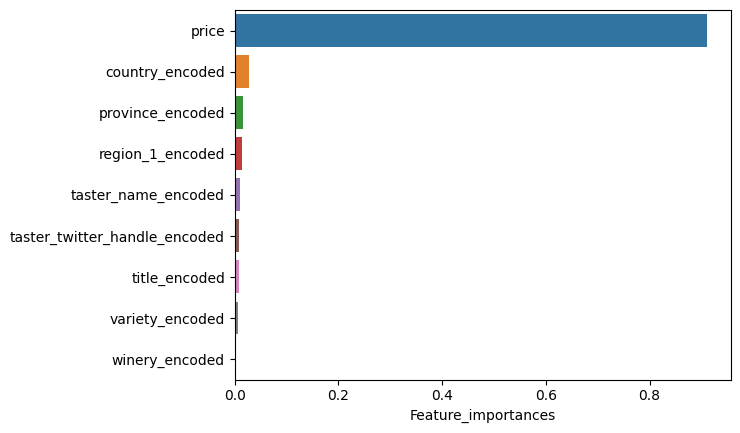

In [ ]:
# 데이터프레임 dft1의 막대그래프 그리기

import seaborn as sns
sns.barplot(y=dft.index, x="Feature_importances", data=dft1);

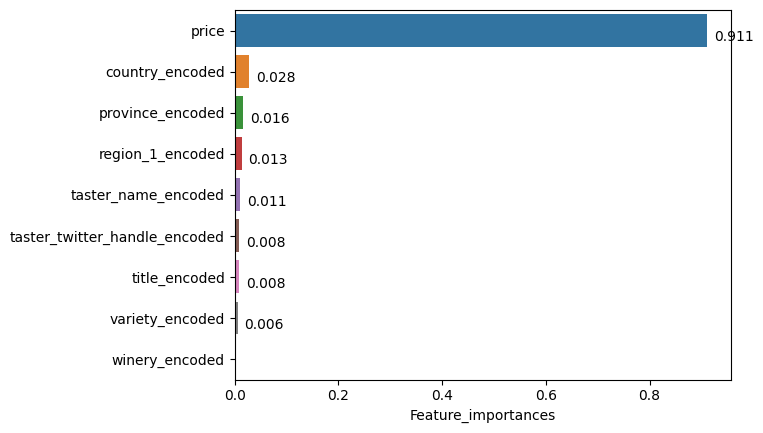

In [ ]:
# 데이터프레임 dft의 막대그래프 그리기 및 값 표시
import matplotlib.pyplot as plt
%matplotlib inline

ax = sns.barplot(y=dft.index, x="Feature_importances", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1),
                xytext=(5, 10), textcoords='offset points')

**결정트리 결과물**

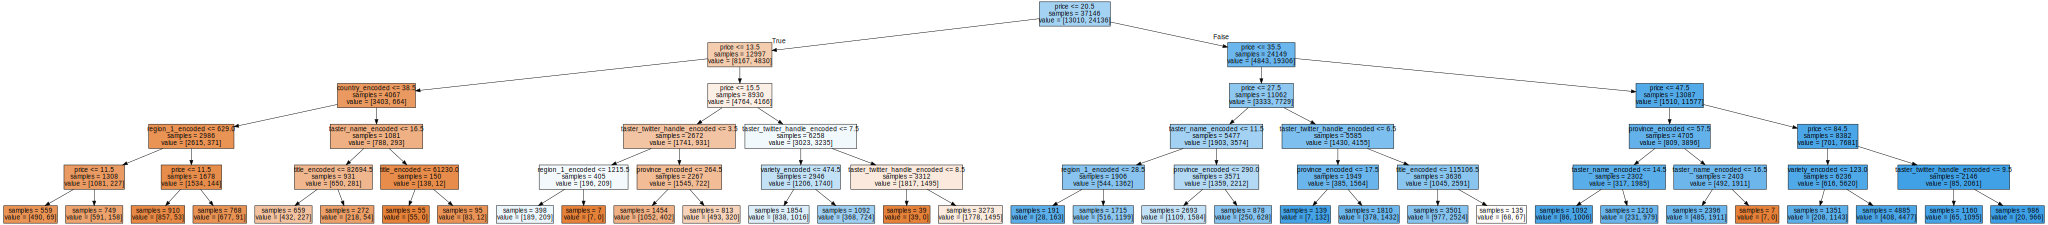

In [ ]:
# model의 결과물을 tree.dot에 저장      
import graphviz
from sklearn.tree import export_graphviz 
export_graphviz(best_clf, out_file = "tree.dot",   
                feature_names = list(data.columns), impurity = False , filled = True )

# tree.dot을 graphviz 기능을 통해 디스플레이.
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read() 
display(graphviz.Source(dot_graph)) 

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74292 entries, 2 to 129970
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   points                         74292 non-null  int64  
 1   price                          74292 non-null  float64
 2   points_B                       74292 non-null  float64
 3   country_encoded                74292 non-null  float64
 4   province_encoded               74292 non-null  float64
 5   region_1_encoded               74292 non-null  float64
 6   taster_name_encoded            74292 non-null  float64
 7   taster_twitter_handle_encoded  74292 non-null  float64
 8   title_encoded                  74292 non-null  float64
 9   variety_encoded                74292 non-null  float64
 10  winery_encoded                 74292 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 6.8 MB


# **로지스틱 회귀(Logistic Regression) 분류 모델**

In [ ]:
df3.shape

(74292, 11)

In [ ]:
#points 제거
dfl = df3.drop(['points'], axis=1)
dfl.head()

,price,points_B,country_encoded,province_encoded,region_1_encoded,taster_name_encoded,taster_twitter_handle_encoded,title_encoded,variety_encoded,winery_encoded
2,14.0,0.0,40.0,268.0,1217.0,14.0,7.0,89782.0,436.0,13018.0
4,65.0,0.0,40.0,268.0,1217.0,14.0,7.0,102810.0,440.0,14621.0
5,15.0,0.0,37.0,262.0,757.0,12.0,12.0,103585.0,590.0,14706.0
6,16.0,0.0,22.0,331.0,1204.0,9.0,4.0,105740.0,186.0,15014.0
7,24.0,0.0,15.0,11.0,21.0,15.0,10.0,108546.0,209.0,15395.0


**로지스틱 회귀 - 표준화**

In [ ]:
# 구간 변수들만 별도로 모아 데이터프레임 df_num을 만든다. 
numeric_cols = ['price']
df_num = dfl[numeric_cols]

# StandardScaler( )로 데이터 스케일 표준화를 실행하고 결과를 데이터프레임으로 만든다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_standard = pd.DataFrame(scaler.fit_transform(df_num))

# StandardScaler( )는 변수명을 지우므로, 새로 만든 데이터프레임에 다시 변수명을 넣는다.
df_num_standard.columns = df_num.columns
df_num_standard.head()

,price
0,-0.516195
1,0.608459
2,-0.494143
3,-0.472091
4,-0.295675


In [ ]:
df_cat = dfl.drop(numeric_cols, axis=1) # 원래 데이터프레임 df에서 구간변수들을 제거하여 df_cat에 저장

In [ ]:
# 구간변수 스케일을 표준화한 df_num_standard와 범주형 변수만 담은 df_cat을 병합
dfu_standard = pd.concat([df_num_standard, df_cat], axis=1)
dfu_standard.columns   # dfu의 변수명을 나열

Index(['price', 'points_B', 'country_encoded', 'province_encoded',
       'region_1_encoded', 'taster_name_encoded',
       'taster_twitter_handle_encoded', 'title_encoded', 'variety_encoded',
       'winery_encoded'],
      dtype='object')

표준화한 데이터셋으로 로지스틱 회귀 재시행

Accuracy(Logreg) on test set:0.66431
ROC AUC on test set:0.55521


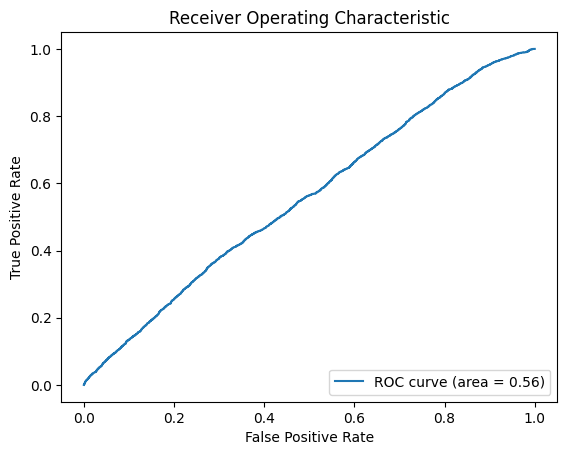

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 결측값 처리
dfl = dfl.dropna()

# 'price' 열을 표준화합니다.
scaler = StandardScaler()
dfl['price'] = scaler.fit_transform(dfl[['price']])

# 타겟 변수와 특징 변수를 분리합니다.
y = dfl['points_B']
X = dfl.drop('points_B', axis=1)

# 데이터셋을 훈련셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델을 생성하고 훈련시킵니다.
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 테스트셋으로 모델을 평가합니다.
score = model.score(X_test, y_test)
print("Accuracy(Logreg) on test set:{:.5f}".format(score))

# AUC-ROC 계산
y_pred_proba = model.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC on test set:{:.5f}".format(auc))

# ROC curve를 그립니다.
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC curve (area = {auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc=4)
plt.show()

#로지스틱 회귀 재실행
#ROC AUC

**로지스틱 회귀 - 그리드 서치**

In [ ]:
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_)) 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


GridSearchCV max accuracy:0.65268
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'lbfgs'}


In [ ]:
from sklearn.metrics import accuracy_score

best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.66445


# **오즈비**

In [ ]:
# 변수명을 Index로 만들고 coefficient값을 제곱한 Odds ratio값을 Index에 매칭한 데이터프레임 만들기 

feature_names = list(X.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(np.exp(best_clf.coef_),3).transpose(), index=feature_names,
                   columns=['Odds_ratio'])
dft1 = dft.sort_values(by='Odds_ratio', ascending=False)   # 컬럼 coef의 값들을 내림차순으로 정리
dft1      

,Odds_ratio
country_encoded,1.019
price,1.003
taster_name_encoded,1.003
province_encoded,1.000
region_1_encoded,1.000
title_encoded,1.000
variety_encoded,1.000
winery_encoded,1.000
taster_twitter_handle_encoded,0.998


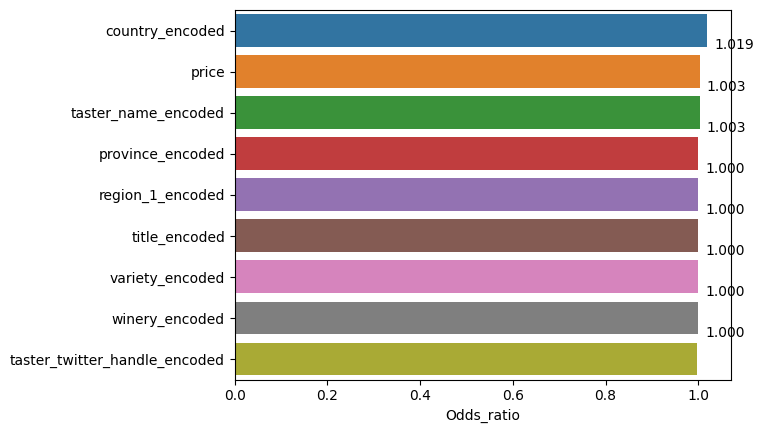

In [ ]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ax = sns.barplot(y=dft1.index, x="Odds_ratio", data=dft1) #구간변수

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.2),
                xytext=(5, 10), textcoords='offset points')

# **신경망**

In [ ]:
#points 제거
dfn = df3.drop(['points'], axis=1)
dfn.head(3)

,price,points_B,country_encoded,province_encoded,region_1_encoded,taster_name_encoded,taster_twitter_handle_encoded,title_encoded,variety_encoded,winery_encoded
2,14.0,0.0,40.0,268.0,1217.0,14.0,7.0,89782.0,436.0,13018.0
4,65.0,0.0,40.0,268.0,1217.0,14.0,7.0,102810.0,440.0,14621.0
5,15.0,0.0,37.0,262.0,757.0,12.0,12.0,103585.0,590.0,14706.0


In [ ]:
data = dfn.drop(['points_B'], axis=1)
target = dfn['points_B']

In [ ]:
#50:50 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42
)

In [ ]:
# Neural Network 모델 (Default 모델 with adam solver)
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score
clf_mlp = MLPClassifier(max_iter = 2000, random_state = 0)
                       # convergence warinng을 회피하기 위해 max_iter = 2000으로 올려서 설정
clf_mlp.fit(X_train, y_train)
pred = clf_mlp.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("Neural Network Training set score:{:.5f}".format(clf_mlp.score(X_train, y_train))) 
print ("Neural Network Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Neural Network Training set score:0.49747
Neural Network Test set score:0.49602


**신경망 - 그리드 서치**

In [ ]:
# 신경망 기본 모델 (with adam solver)
clf_mlp = MLPClassifier(max_iter = 15, random_state = 0, verbose=10)

# 그리드 서치 재실행
from sklearn.model_selection import GridSearchCV
params = {'solver':['sgd', 'lbfgs', 'adam'],
          'alpha':[0.0001, 0.01, 1],
          'activation':['tanh','relu', 'logistic'],
          'hidden_layer_sizes': [(100,), (100,100)]
         }

grid_mlp = GridSearchCV(clf_mlp, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_mlp.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_mlp.best_score_))
print("GridSearchCV best parameter:", (grid_mlp.best_params_)) 

Iteration 1, loss = 0.65030576
Iteration 2, loss = 0.64872454
Iteration 3, loss = 0.64881678
Iteration 4, loss = 0.64823596
Iteration 5, loss = 0.64835933
Iteration 6, loss = 0.64832474
Iteration 7, loss = 0.64838026
Iteration 8, loss = 0.64821108
Iteration 9, loss = 0.64847696
Iteration 10, loss = 0.64892306
Iteration 11, loss = 0.64839524
Iteration 12, loss = 0.64799158
Iteration 13, loss = 0.64821971
Iteration 14, loss = 0.64815643
Iteration 15, loss = 0.64806136
GridSearchCV max accuracy:0.64981
GridSearchCV best parameter: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
best_clf = grid_mlp.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.65757


# **Random Forest 모델**

In [ ]:
#points 제거
dfr = df3.drop(['points'], axis=1)
dfr.head(3)

,price,points_B,country_encoded,province_encoded,region_1_encoded,taster_name_encoded,taster_twitter_handle_encoded,title_encoded,variety_encoded,winery_encoded
2,14.0,0.0,40.0,268.0,1217.0,14.0,7.0,89782.0,436.0,13018.0
4,65.0,0.0,40.0,268.0,1217.0,14.0,7.0,102810.0,440.0,14621.0
5,15.0,0.0,37.0,262.0,757.0,12.0,12.0,103585.0,590.0,14706.0


In [ ]:
# 범주형 변수를 cols1에 저장.
cols = ['price', 'points_B', 'country_encoded', 'province_encoded', 'region_1_encoded', 'taster_name_encoded',
        'taster_twitter_handle_encoded', 'title_encoded', 'variety_encoded', 'winery_encoded'] 

# 범주형 변수의 dtype을 category로 변경
dfr[cols] = dfr[cols].astype('category')
dfr.dtypes

price                            category
points_B                         category
country_encoded                  category
province_encoded                 category
region_1_encoded                 category
taster_name_encoded              category
taster_twitter_handle_encoded    category
title_encoded                    category
variety_encoded                  category
winery_encoded                   category
dtype: object

In [ ]:
data = dfr.drop(['points_B'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장
target = dfr['points_B']  

In [ ]:
data.shape
target.shape

(74292,)

In [ ]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

In [ ]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 100, random_state=0) 
model = rf.fit(X_train, y_train) 
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
#accuracy = accuracy_score(y_test, pred)

print ("Random Forest Accuracy on training set:{:.5f}".format(model.score(X_train, y_train))) 
print ("Random Forest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred))) 

Random Forest Accuracy on training set:0.99943
Random Forest Accuracy on test set:0.78391


**랜덤포레스트 - 그리드 서치**

In [ ]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
rf = RandomForestClassifier(n_estimators = 100, random_state=0) 

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'max_depth': range(10, 41), 'n_estimators': [100, 200]}

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_rf = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=cross_validation,
                       verbose=1, n_jobs=-1) 
grid_rf.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_rf.best_score_))
print("GridSearchCV best parameter:", (grid_rf.best_params_)) 

Fitting 5 folds for each of 62 candidates, totalling 310 fits
GridSearchCV max accuracy:0.78210
GridSearchCV best parameter: {'max_depth': 17, 'n_estimators': 200}


**랜덤 포레스트 - ROC AUC**

In [ ]:
best_clf = grid_rf.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.78506
ROC AUC on test set:0.84627


In [ ]:
# 참조 코딩
print ("Feature importances:") 
print (best_clf.feature_importances_) 

Feature importances:
[0.39349754 0.01456573 0.03853182 0.09732081 0.02307687 0.03527635
 0.17191215 0.09087928 0.13493945]


In [ ]:
# 변수명을 Index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기 

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 3), index=feature_names,
                   columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)   
dft1                                 # 컬럼 Feature_importances의 값들을 내림차순으로 정리 

,Feature_importances
price,0.393
title_encoded,0.172
winery_encoded,0.135
region_1_encoded,0.097
variety_encoded,0.091
province_encoded,0.039
taster_twitter_handle_encoded,0.035
taster_name_encoded,0.023
country_encoded,0.015


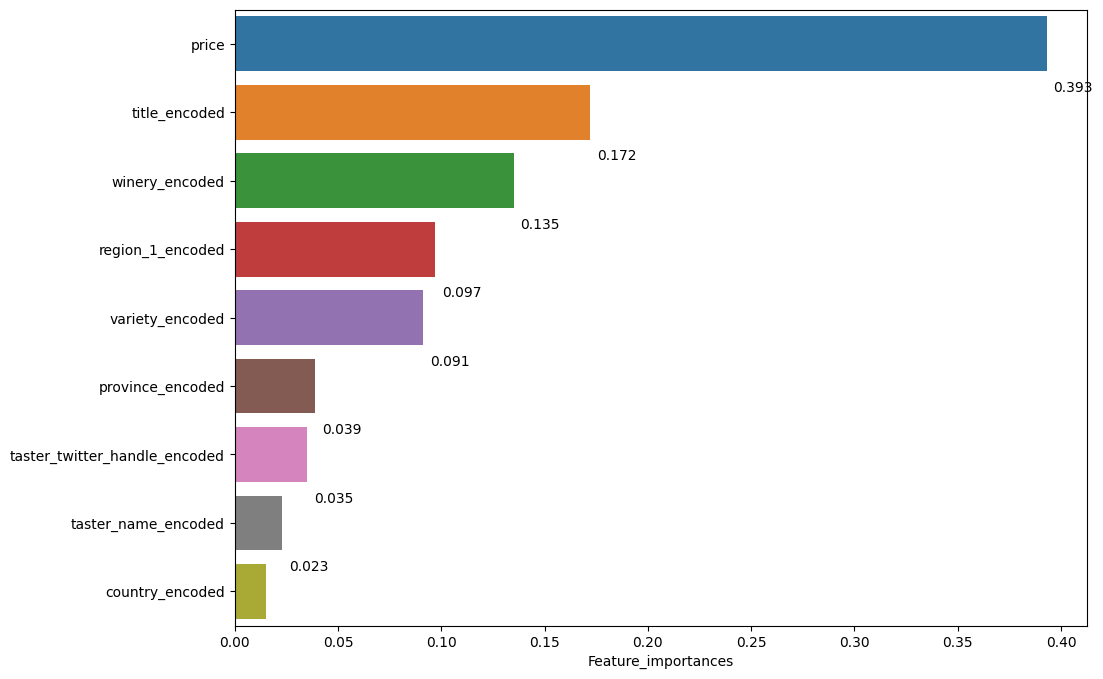

In [ ]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(11, 8))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.3),
                xytext=(5, 10), textcoords='offset points')

# **연속 변수 타겟변수**  

In [ ]:
dflr = df3
dflr.head(3)

,points,price,points_B,country_encoded,province_encoded,region_1_encoded,taster_name_encoded,taster_twitter_handle_encoded,title_encoded,variety_encoded,winery_encoded
2,87,14.0,0.0,40.0,268.0,1217.0,14.0,7.0,89782.0,436.0,13018.0
4,87,65.0,0.0,40.0,268.0,1217.0,14.0,7.0,102810.0,440.0,14621.0
5,87,15.0,0.0,37.0,262.0,757.0,12.0,12.0,103585.0,590.0,14706.0


In [ ]:
data = dflr.drop(['points'], axis=1)   # 타겟변수(VALP임에 주의)를 제외한 입력변수를 data에 저장
target = dflr['points']                # 타겟변수만 target에 저장

# 50:50 data partition.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape) 

X_train shape: (37146, 10)
X_test shape: (37146, 10)


**데이터 표준화**

In [ ]:
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regression 모델

In [ ]:
# 연속변수 타겟변수일 때 Linear Regression 모델 (Default 모델)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linr = LinearRegression(n_jobs=-1)
model = linr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Linear Regression Training set r2 score:{:.5f}".format(model.score(X_train, y_train))) 
print ("Linear Regression Test set r2 score:{:.5f}".format(r2_score(y_test, pred))) 

Linear Regression Training set r2 score:0.66982
Linear Regression Test set r2 score:0.65356


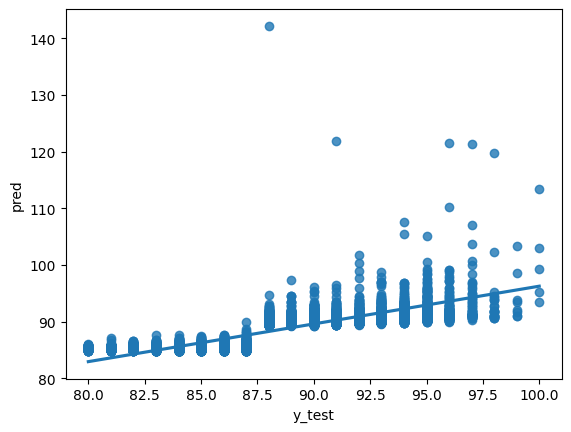

In [ ]:
import seaborn as sns

final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(pred)], axis = 1)
final_result.columns = ['y_test','pred']
sns.regplot(x = 'y_test', y = 'pred', data = final_result);

# Ridge 모델

In [ ]:
# 연속변수 타겟변수일 때 Ridge 모델 (Default 모델)
from sklearn.linear_model import Ridge
Ridge = Ridge()
model = Ridge.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print ("Linear Regression Training set score:{:.5f}".format(model.score(X_train, y_train))) 
print ("Linear Regression Test set score:{:.5f}".format(r2_score(y_test, pred)))

Linear Regression Training set score:0.66982
Linear Regression Test set score:0.65356


In [ ]:
# 연속변수 타겟변수일 때 Ridge 모델 (Default 모델)
from sklearn.linear_model import Ridge
Ridge = Ridge()

**릿지 모델 - 그리드 서치**

In [ ]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],\
         'solver':['auto', 'svd', 'lsqr', 'cholesky','sparse_cg','sag','saga','lbfgs']}

grid_Ridge = GridSearchCV(Ridge, param_grid=params, scoring='r2', cv=5,\
                       n_jobs=-1, verbose=1)
grid_Ridge.fit(X_train, y_train)

print("GridSearchCV max score:{:.5f}".format(grid_Ridge.best_score_))
print("GridSearchCV best parameter:", (grid_Ridge.best_params_)) 

Fitting 5 folds for each of 56 candidates, totalling 280 fits
GridSearchCV max score:0.66837
GridSearchCV best parameter: {'alpha': 0.001, 'solver': 'svd'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 825, in fit
    raise ValueError(
ValueError: 'lbfgs' solver can be used

In [ ]:
best_clf = grid_Ridge.best_estimator_
pred = best_clf.predict(X_test)

print("R2 Score on test set:{:.5f}".format(best_clf.score(X_test, y_test)))

R2 Score on test set:0.65356


# **XGBoost 모델**

In [17]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [20]:
dfxg = df3.drop(['points_B'], axis=1)   # 이진값 타겟변수 VALP_B1를 제외
dfxg.head(3)

,points,price,country_encoded,province_encoded,region_1_encoded,taster_name_encoded,taster_twitter_handle_encoded,title_encoded,variety_encoded,winery_encoded
2,87,14.0,40.0,268.0,1217.0,14.0,7.0,89782.0,436.0,13018.0
4,87,65.0,40.0,268.0,1217.0,14.0,7.0,102810.0,440.0,14621.0
5,87,15.0,37.0,262.0,757.0,12.0,12.0,103585.0,590.0,14706.0


In [21]:
data = dfxg.drop(['points'], axis=1)   # 타겟변수(VALP임에 주의)를 제외한 입력변수를 data에 저장
target = dfxg['points']                # 타겟변수만 target에 저장

# 50:50 데이터 변환
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

In [22]:
# 기본 XGBRegressor 모델
from sklearn.metrics import r2_score

xgb = XGBRegressor(random_state=0)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))


r2: 0.50486


**XGBoost 모델 - 그리드 서치**

In [23]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()

parameters = {'colsample_bytree': [0.7],
              'learning_rate': [0.05],
              'max_depth': [16],
              'min_child_weight' : [4],
              'n_estimators': [1000],
              'subsample': [0.8, 0.9]
              }

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        scoring = 'r2',
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)
xgb_grid.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', xgb_grid.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
GridSearchCV 최적 파라미터: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 16, 'min_child_weight': 4, 'n_estimators': 1000, 'subsample': 0.9}


In [24]:
model = xgb_grid.best_estimator_
pred = model.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.53262


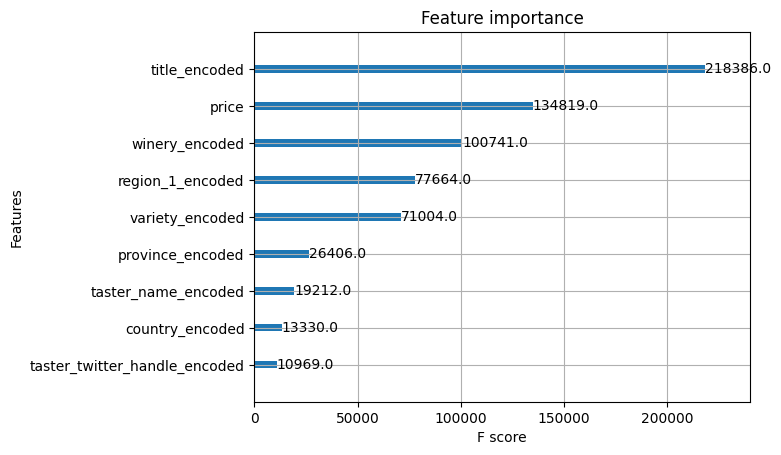

In [25]:
from xgboost import plot_importance

plot_importance(model, max_num_features=10);

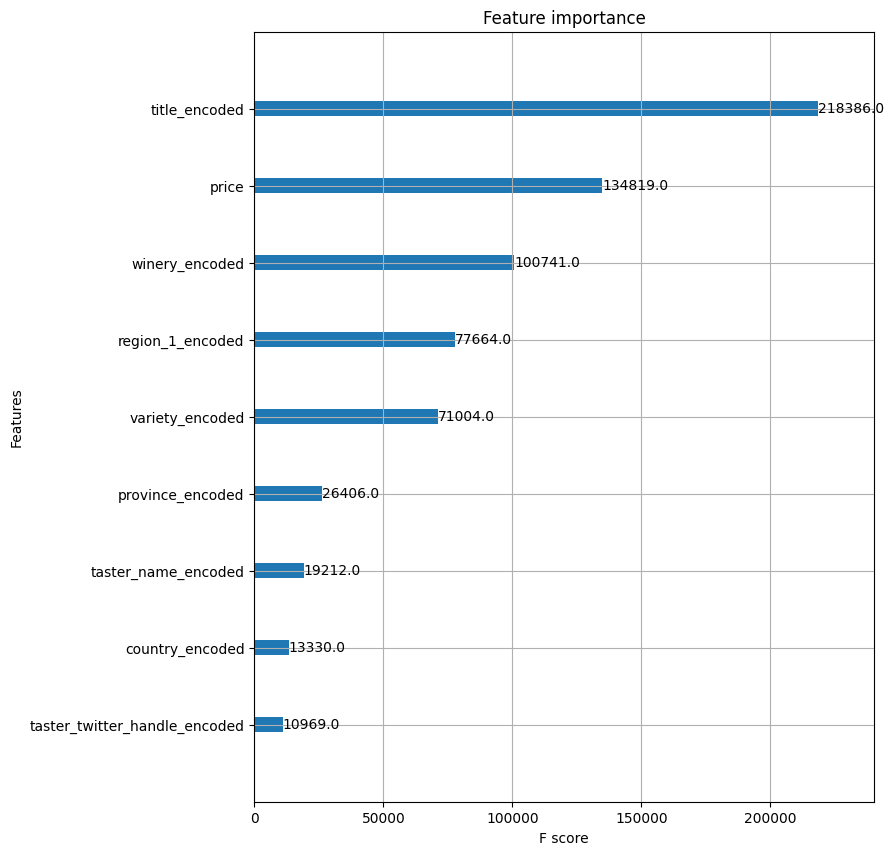

In [26]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 10))
plot_importance(model, ax=ax);

# **LightGBM 모델**

In [27]:
# 기본 lGBMRegressor 모델
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

lgb = LGBMRegressor(random_state=0)
lgb.fit(X_train, y_train)
pred = lgb.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.48038


**LightGBM 모델 - 그리드 서치**

In [28]:
#그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

parameters = {'colsample_bytree': [0.7, 0.8],
              'learning_rate': [0.1, 0.15, 0.2],
              'max_depth': [11],
              'min_child_weight' : [4],
              'n_estimators': [1000],
              'subsample': [0.3, 0.4]
              }

lgb_grid = GridSearchCV(lgb,
                        parameters,
                        scoring = 'r2',
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)
lgb_grid.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', lgb_grid.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
GridSearchCV 최적 파라미터: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 4, 'n_estimators': 1000, 'subsample': 0.3}


In [29]:
from sklearn.metrics import r2_score

model = lgb_grid.best_estimator_
pred = model.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.52365


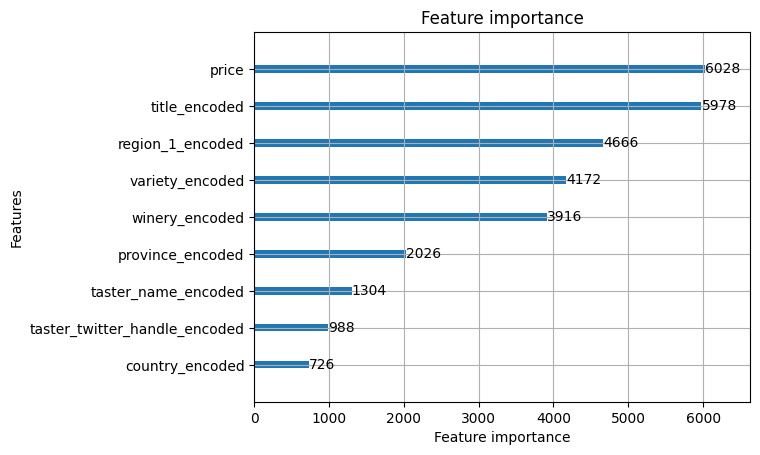

In [31]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

plot_importance(model, max_num_features=10);